# Analysis of Calendar Table — Inside Airbnb Santiago

## 1. Introduction

The calendar table contains daily availability and pricing information for each Airbnb listing in Santiago.  
This exploratory data analysis aims to prepare the dataset for deeper investigations into pricing trends and availability patterns, ultimately supporting data-driven insights for Airbnb hosts and guests.



## 2. Load and Preview
In this section, we will load the calendar dataset, examine its dimensions and structure, and perform an initial check for missing values. Specifically, we will:

- Load the dataset from the local folder.
- Display the shape and data types of the dataframe.
- Show a preview of the first few rows.
- Summarize missing values by column.

In [3]:
import pandas as pd

# Load the calendar data from a gzipped CSV file
df_calendar = pd.read_csv('santiago/calendar.csv.gz', compression='gzip') 


# Preview the data
print("\n----Preview:\n")
display(df_calendar.head())

print("\n----Info:\n")
df_calendar.info()

print("\n----Shape:\n")
print(df_calendar.shape)

# Check for missing values
print("\n----Missing Values:\n")
print(df_calendar.isnull().sum())


----Preview:



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49392,2024-12-27,f,$55.00,NaN,3,730
1,49392,2024-12-28,f,$55.00,NaN,3,730
2,49392,2024-12-29,t,$55.00,NaN,3,730
3,49392,2024-12-30,t,$55.00,NaN,3,730
4,49392,2024-12-31,t,$55.00,NaN,3,730



----Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5493615 entries, 0 to 5493614
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 293.4+ MB

----Shape:

(5493615, 7)

----Missing Values:

listing_id              0
date                    0
available               0
price                   0
adjusted_price    5493615
minimum_nights          0
maximum_nights          0
dtype: int64


#### Observations

- The calendar table contains 5,493,615 rows and 7 columns.  

- Columns include listing ID, date, price, availability, and more. 

- The price column is in Chilean Pesos (CLP). To facilitate comparison and analysis, I will add a new column `price_usd`

- Several columns are incorrectly typed as `object` and will be converted to the appropriate types during cleaning.

- The `adjusted_price` column contains only null values and will be dropped during cleaning.  

- Aside from this, no other columns contain missing values.


## 3. Cleaning

In this section, I will clean the calendar dataset by:

- Dropping irrelevant columns.
- Converting data types to appropriate formats.
- Handling missing values.
- Adding `price_usd` column.
- Renaming columns for clarity and consistency

### 3.1 Drop irrelevant columns and handle missing values

The `adjusted_price` column contains only null values, so it provides no useful information and will be dropped from the dataset. Since no other columns have missing values, no further imputation is required at this stage.



In [4]:
# Drop the 'adjusted_price' column
df_calendar.drop(columns=['adjusted_price'], inplace=True)

### 3.2 Convert data types

- The `date` column is stored as a string but should be converted to a `datetime` type for proper time-series analysis. 

- The `price` column is stored as a string and contains currency symbols, which must be cleaned and converted to numeric values for quantitative analysis.  

- The `available` column is currently represented as `'t'` and `'f'` strings. I will map these to boolean `True` and `False` values to facilitate logical operations and analyses.  



In [5]:
# Convert 'date' column from string to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')

# Clean 'price' column by removing '$' and ',' then convert to float
df_calendar['price'] = df_calendar['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Map 'available' column values from 't'/'f' strings to boolean True/False
df_calendar['available'] = df_calendar['available'].map({'t': True, 'f': False}).astype('boolean')

# Check the updated DataFrame
df_calendar.dtypes


listing_id                 int64
date              datetime64[ns]
available                boolean
price                    float64
minimum_nights             int64
maximum_nights             int64
dtype: object

### 3.3 Rename columns

To improve clarity and consistency in naming:

- `price` → `price_clp`: reflects that the original price is in Chilean Pesos

- `available` → `is_available`: uses a boolean-style naming convention for clarity

In [6]:
# Rename columns for clarity
df_calendar.rename(columns={
     'available': 'is_available',
    'price': 'price_clp'
}, inplace=True)

### 3.4 Add calculated column
The price column is in Chilean Pesos (CLP). To facilitate comparison and analysis, I will add a new column price_usd by converting prices to US dollars using an approximate exchange rate of 1 CLP = 0.0011 USD.

In [7]:
# Define exchange rate
exchange_rate = 0.0011

# Calculate price in USD
price_usd = (df_calendar['price_clp'] * exchange_rate).round(2)

# Insert 'price_usd' column right after 'price_clp'
price_clp_index = df_calendar.columns.get_loc('price_clp')
df_calendar.insert(price_clp_index + 1, 'price_usd', price_usd)

# Preview the cleaned DataFrame
print("\n----Cleaned DataFrame:\n")
display(df_calendar.head())


----Cleaned DataFrame:



,listing_id,date,is_available,price_clp,price_usd,minimum_nights,maximum_nights
0,49392,2024-12-27,False,55.0,0.06,3,730
1,49392,2024-12-28,False,55.0,0.06,3,730
2,49392,2024-12-29,True,55.0,0.06,3,730
3,49392,2024-12-30,True,55.0,0.06,3,730
4,49392,2024-12-31,True,55.0,0.06,3,730


## 4. Exploratory Data Analysis

In this section I will do a deeper analysis of the data

### 4.1 Descriptive Statistics and Initial Insights

This section..... 

In [8]:
# Statistics of the column price_clp
print("\n----Statistics of 'price_clp':\n")
print(df_calendar['price_clp'].describe().round(2))
print("99th percentile:", df_calendar['price_clp'].quantile(0.99).round(2))

# Statistics of the column price_usd
print("\n----Statistics of 'price_usd':\n")
print(df_calendar['price_usd'].describe().round(2))
print("99th percentile:", df_calendar['price_usd'].quantile(0.99).round(2))

# Statistics of the column minimum_nights
print("\n----Statistics of 'minimum_nights':\n")
print(df_calendar['minimum_nights'].describe().round(2))

print("\n----Statistics of 'maximum_nights':\n")
print(df_calendar['maximum_nights'].describe().apply(lambda x: f"{x:,.0f}"))


# Minimum and maximum dates
print("\n----Minimum date:\n")
print(df_calendar['date'].min())

print("\n----Maximum date:\n")
print(df_calendar['date'].max())


----Statistics of 'price_clp':

count     5493615.00
mean        71615.67
std        917849.61
min            11.00
25%         25000.00
50%         38037.00
75%         56000.00
max      89000000.00
Name: price_clp, dtype: float64
99th percentile: 450000.0

----Statistics of 'price_usd':

count    5493615.00
mean          78.78
std         1009.63
min            0.01
25%           27.50
50%           41.84
75%           61.60
max        97900.00
Name: price_usd, dtype: float64
99th percentile: 495.0

----Statistics of 'minimum_nights':

count    5493615.00
mean           5.83
std           32.23
min            1.00
25%            1.00
50%            2.00
75%            3.00
max         1124.00
Name: minimum_nights, dtype: float64

----Statistics of 'maximum_nights':

count        5,493,615
mean           285,978
std         24,753,308
min                  1
25%                365
50%                365
75%              1,125
max      2,147,483,647
Name: maximum_nights, dtype: object


##### **Observations**:


- **Data range:**
    - The calendar data covers listings from **December 27, 2024 to December 26, 2025**, providing a full year of daily availability and pricing.
    
- **Prices:**
    - Prices vary widely, from as low as ***11 CLP (~0.01 USD)** to a staggering **89 million CLP (~97,900 USD)**, indicating the presence of extreme outliers that skew the mean and standard deviation.
    - The **average price** is around **71,616 CLP (~79 USD)**, but this figure is heavily influenced by these extreme values.
    - The **99th percentile** price is **450,000 CLP (~495 USD)**, meaning 99% of listings are priced below this threshold.
    - Most listings cluster between **25,000 and 56,000 CLP (approximately 26 to 60 USD)**, which better represents typical pricing.
    - The minimum price of 11 CLP seems unrealistic and may indicate data entry errors.

- **Minimum and maximum nights:**
    - The average **minimum nights** value is about 5.8, but this is skewed by very high values. The median **minimum nights of 2** is a more reliable measure, showing most listings require a stay of 2 nights or more.
    - The maximum nights values include some extremely large and unrealistic numbers, such as the maximum value of **2,147,483,647 (over 5 million years)**, which likely represent data entry errors or default values set by hosts.
    - The average maximum nights is inflated (285,978 days) due to these outliers, so this metric should be treated cautiously.


### 4.2 Visualizing distributions (??? is this the best name for this section)

We complement these statistics with plots to better understand the shape and spread of the data:

- Price

(This needs to be completed)  


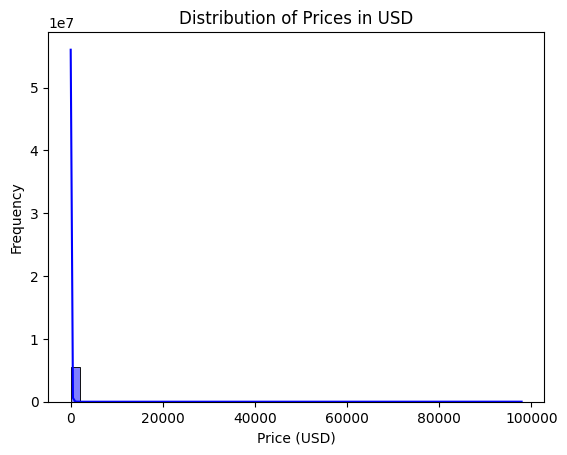

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_calendar['price_usd'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Prices in USD')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('figures/calendar_price_distribution.png', dpi=300)
plt.show()

Since there are some very extreme high prices, this plot it's not very insightful, so now I will create a new one, but applying some filters.

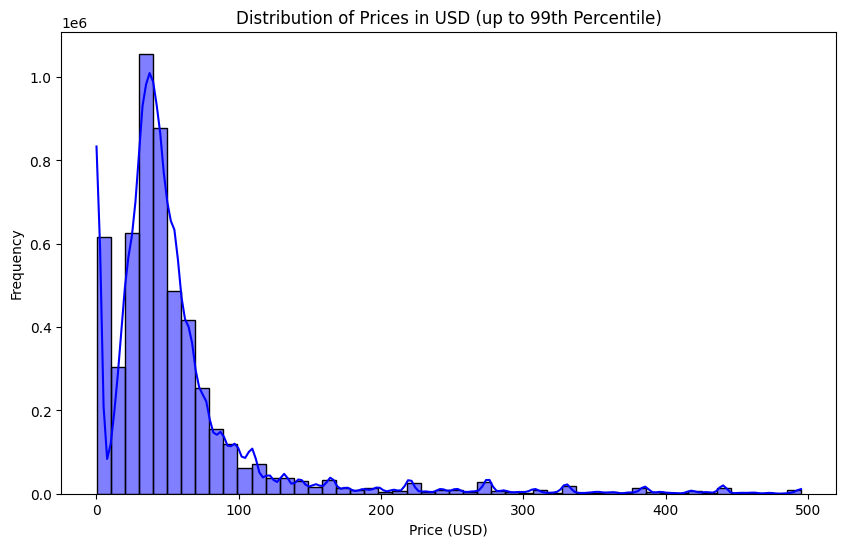

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

q99 = df_calendar['price_usd'].quantile(0.99)
price_q99 = df_calendar[df_calendar['price_usd'] <= q99]['price_usd']

plt.figure(figsize=(10, 6))
sns.histplot(price_q99, bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Prices in USD (up to 99th Percentile)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('figures/calendar_price_distribution_q99.png', dpi=300)
plt.show()


We can also zoom-in into the quartile 75

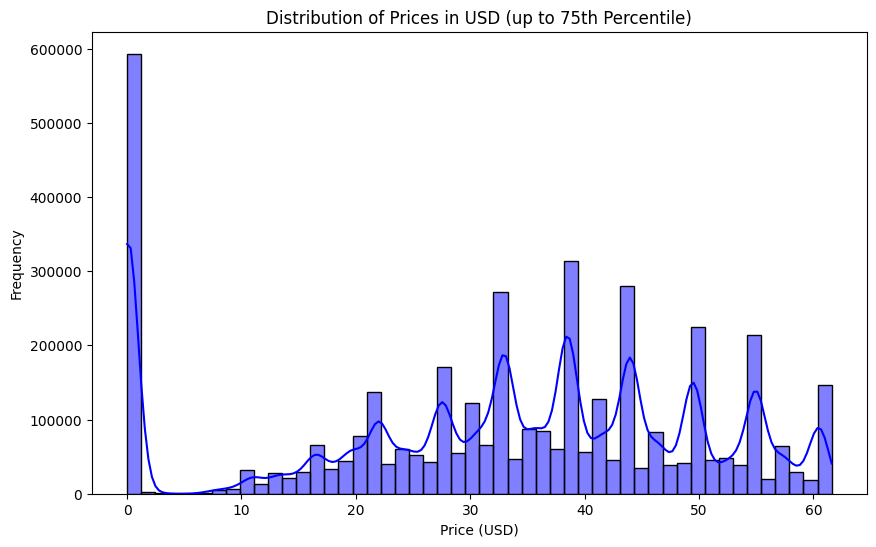

In [81]:
q75 = df_calendar['price_usd'].quantile(0.75)
price_q75 = df_calendar[df_calendar['price_usd'] <= q75]['price_usd']

plt.figure(figsize=(10, 6))
sns.histplot(price_q75, bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Prices in USD (up to 75th Percentile)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('figures/calendar_price_distribution_q75.png', dpi=300)
plt.show()

Observations:


(Here I need to decide what to do with the outliers, leave them outside of the analysis, replace the price with the median?? from what price should I consider outliers? from the percentile 75 or 99?? what about the low prices, the ones closer to 0??)

In [82]:
# Filter outliers based on the 99th percentile and prices below 10 USD
df_calendar_filtered = df_calendar[
    (df_calendar['price_usd'] <= q99) & 
    (df_calendar['price_usd'] >= 10)
]

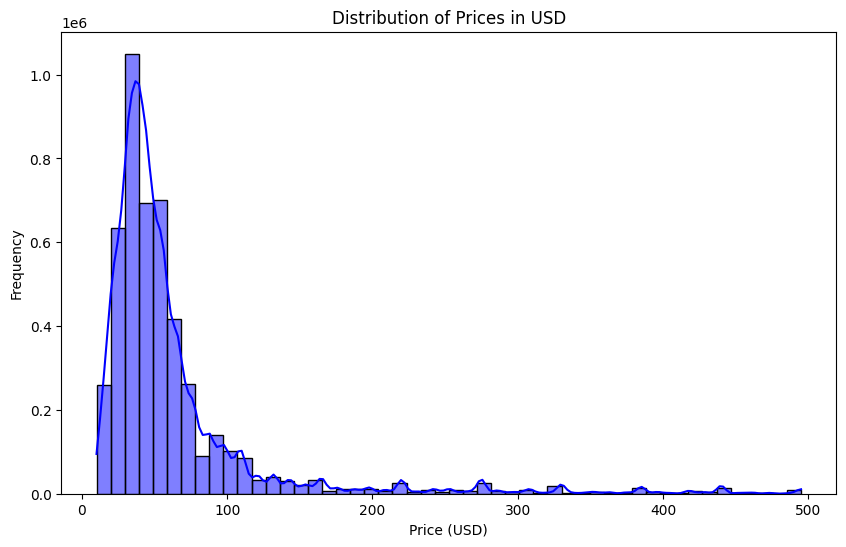

In [79]:
# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(df_calendar_filtered['price_usd'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Prices in USD')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
# Save the filtered plot as a PNG file
# plt.savefig('figures/calendar_price_distribution_filtered.png', dpi=300)
plt.show()

- Minimun and maximum nights



- Price vs availability




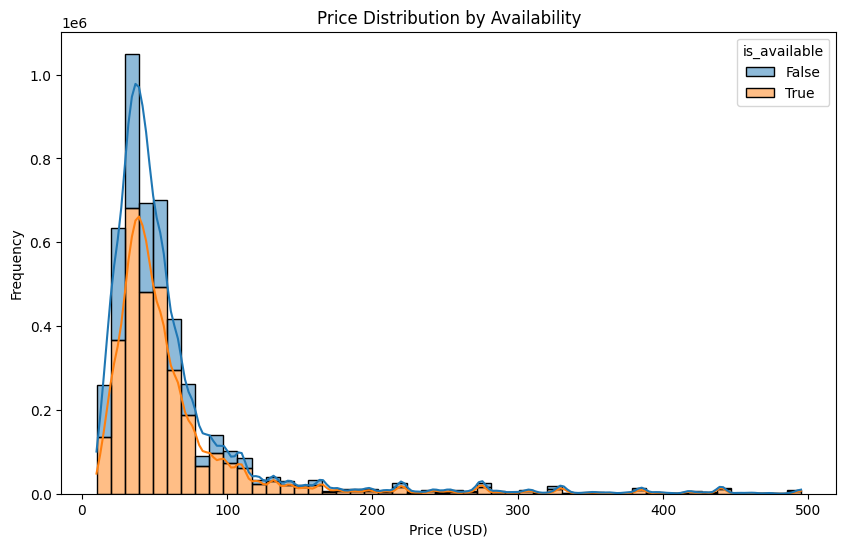

In [83]:
# Price distribution by availability
plt.figure(figsize=(10, 6))
sns.histplot(data=df_calendar_filtered, x='price_usd', hue='is_available', multiple='stack', bins=50, kde=True, edgecolor='black')
plt.title('Price Distribution by Availability')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
# Save the plot as a PNG file
# plt.savefig('figures/calendar_price_distribution_by_availability.png', dpi=300)
plt.show()


/tmp/ipykernel_20396/113566243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_filtered['month'] = df_calendar_filtered['date'].dt.month


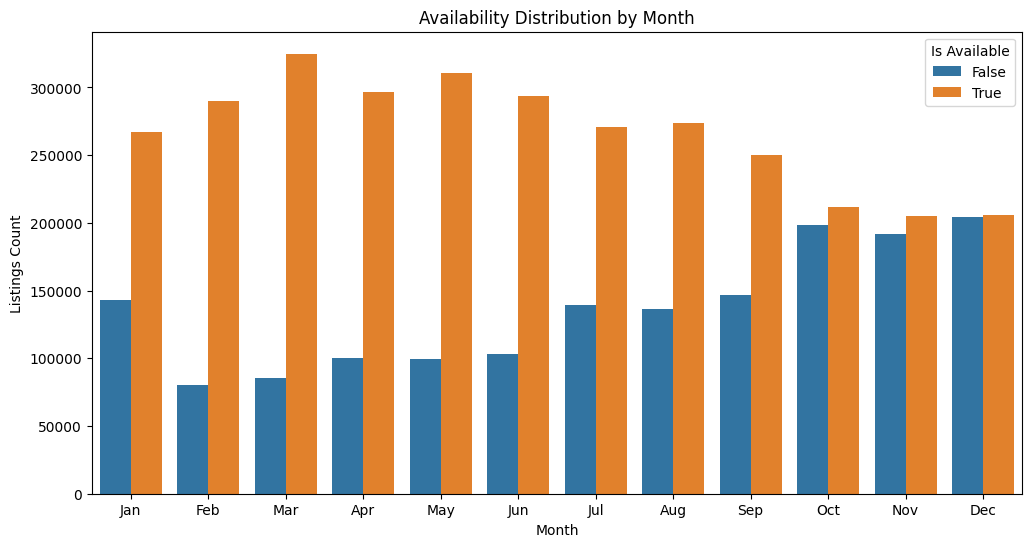

In [92]:
# Availability distribution by month
df_calendar_filtered['month'] = df_calendar_filtered['date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df_calendar_filtered, x='month', hue='is_available')
plt.title('Availability Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Listings Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Is Available', loc='upper right')
# Save the plot as a PNG file
# plt.savefig('figures/calendar_availability_distribution_by_month.png', dpi=300)
plt.show()


<Figure size 1200x600 with 0 Axes>

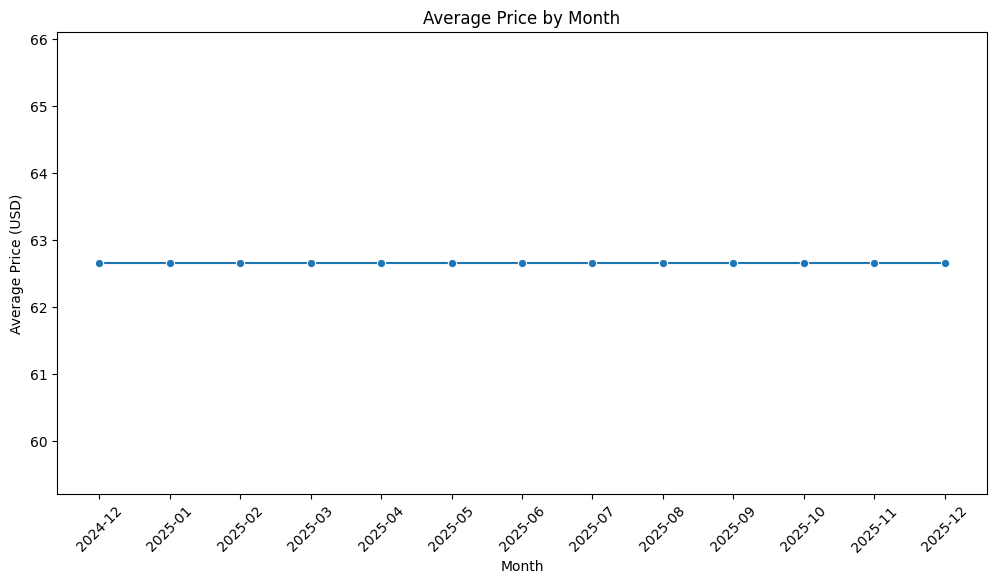

In [106]:
# Line plot of average price by month
plt.figure(figsize=(12, 6))
avg_price_month = df_calendar_filtered.groupby(df_calendar_filtered['date'].dt.to_period('M'))['price_usd'].mean().reset_index()
avg_price_month['year_month'] = avg_price_month['date'].dt.strftime('%Y-%m')
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_month, x='year_month', y='price_usd', marker='o')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
# Save the plot as a PNG file
# plt.savefig('figures/calendar_average_price_by_month.png', dpi=300)
plt.show()